In [ ]:
Maldição da dimensionalide : QUando temos muitas caracteristicas para cada instancia, o que pode levar a um overfitting. 
de treinamento temos que reduzir a dimensionalidade do conjunto de dados, ou seja, reduzir o número de caracteristicas.

## PCA
This chapter starts with several figures to explain the concepts of PCA and Manifold Learning. Below is the code to generate these figures. You can skip directly to the [Principal Components](#Principal-Components) section below if you want.
Let's generate a small 3D dataset. It's an oval shape, rotated in 3D space, with points distributed unevenly, and with quite a lot of noise:

### Casos de Aplicação de Redução de Dimensionalidade

A redução de dimensionalidade é uma etapa fundamental em muitos fluxos de trabalho de ciência de dados e aprendizado de máquina, especialmente quando lidamos com conjuntos de dados que possuem um grande número de variáveis (características). Os principais objetivos são:

- **Reduzir o risco de overfitting**: Muitos atributos podem fazer o modelo aprender ruídos ao invés de padrões relevantes.
- **Melhorar a visualização**: Projetar dados de alta dimensão em 2D ou 3D facilita a análise visual.
- **Acelerar o treinamento**: Menos dimensões geralmente resultam em menor custo computacional.
- **Remover redundâncias**: Eliminar atributos correlacionados ou irrelevantes.

#### Projeção Linear (Ex: PCA)

A projeção linear, como o PCA (Principal Component Analysis), busca encontrar os eixos de maior variância nos dados e projetar os pontos nesses eixos. É indicada quando:

- A estrutura dos dados pode ser bem representada por combinações lineares das variáveis originais.
- O objetivo é compressão, visualização ou pré-processamento para modelos lineares.
- Os dados estão aproximadamente distribuídos em torno de um subespaço linear.

**Exemplo:** Reduzir imagens de 64x64 pixels para poucas componentes principais, mantendo a maior parte da informação.

#### Aprendizado de Manifold (Manifold Learning)

O aprendizado de manifold é indicado quando os dados estão distribuídos em uma estrutura não linear de menor dimensão embutida em um espaço de alta dimensão. Métodos como t-SNE, Isomap e LLE são usados quando:

- A relação entre as variáveis é não linear.
- Deseja-se preservar relações locais ou a estrutura global do dado original.
- O objetivo é explorar padrões complexos, agrupamentos ou visualização de dados intrinsecamente não lineares.

**Exemplo:** Dados de imagens de dígitos manuscritos, onde cada imagem é um ponto em um espaço de milhares de dimensões, mas as variações reais (como rotação, espessura do traço) vivem em um espaço de poucas dimensões.

---

**Resumo:**  
- Use projeção linear (PCA) quando a estrutura dos dados for aproximadamente linear.
- Use aprendizado de manifold quando suspeitar que os dados vivem em uma estrutura não linear de menor dimensão.  
Ambas as abordagens ajudam a simplificar, visualizar e melhorar o desempenho de modelos em dados de alta dimensão.

In [2]:
#gerando um dataset 3d formato oval
import numpy as np
from scipy.spatial.transform import Rotation 

m = 60
X = np.zeros((m, 3))
np.random.seed(42)
angles = (np.random.rand(m) ** 3 + 0.5) * 2 * np.pi  # uneven distribution
X[:, 0], X[:, 1] = np.cos(angles), np.sin(angles) * 0.5  # oval
X += 0.28 * np.random.randn(m, 3)  # add more noise
X = Rotation.from_rotvec([np.pi / 29, -np.pi / 20, np.pi / 4]).apply(X)
X += [0.2, 0, 0.2]  # shift a bit

NameError: name 'save_fig' is not defined

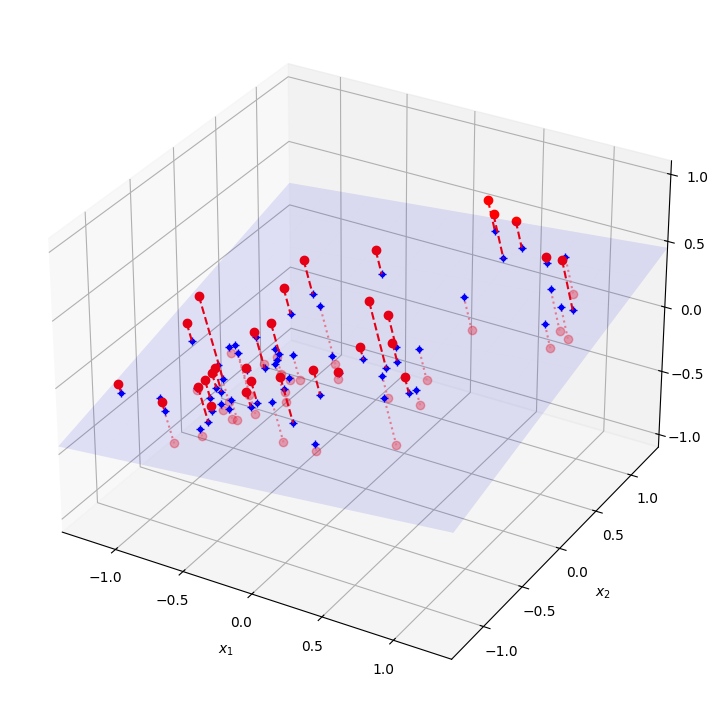

In [3]:
# extra code – this cell generates and saves Figure 8–2

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)  # dataset reduced to 2D
X3D_inv = pca.inverse_transform(X2D)  # 3D position of the projected samples
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)

axes = [-1.4, 1.4, -1.4, 1.4, -1.1, 1.1]
x1, x2 = np.meshgrid(np.linspace(axes[0], axes[1], 10),
                     np.linspace(axes[2], axes[3], 10))
w1, w2 = np.linalg.solve(Vt[:2, :2], Vt[:2, 2])  # projection plane coefs
z = w1 * (x1 - pca.mean_[0]) + w2 * (x2 - pca.mean_[1]) - pca.mean_[2]  # plane
X3D_above = X[X[:, 2] >= X3D_inv[:, 2]]  # samples above plane
X3D_below = X[X[:, 2] < X3D_inv[:, 2]]  # samples below plane

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111, projection="3d")

# plot samples and projection lines below plane first
ax.plot(X3D_below[:, 0], X3D_below[:, 1], X3D_below[:, 2], "ro", alpha=0.3)
for i in range(m):
    if X[i, 2] < X3D_inv[i, 2]:
        ax.plot([X[i][0], X3D_inv[i][0]],
                [X[i][1], X3D_inv[i][1]],
                [X[i][2], X3D_inv[i][2]], ":", color="#F88")

ax.plot_surface(x1, x2, z, alpha=0.1, color="b")  # projection plane
ax.plot(X3D_inv[:, 0], X3D_inv[:, 1], X3D_inv[:, 2], "b+")  # projected samples
ax.plot(X3D_inv[:, 0], X3D_inv[:, 1], X3D_inv[:, 2], "b.")

# now plot projection lines and samples above plane
for i in range(m):
    if X[i, 2] >= X3D_inv[i, 2]:
        ax.plot([X[i][0], X3D_inv[i][0]],
                [X[i][1], X3D_inv[i][1]],
                [X[i][2], X3D_inv[i][2]], "r--")

ax.plot(X3D_above[:, 0], X3D_above[:, 1], X3D_above[:, 2], "ro")

def set_xyz_axes(ax, axes):
    ax.xaxis.set_rotate_label(False)
    ax.yaxis.set_rotate_label(False)
    ax.zaxis.set_rotate_label(False)
    ax.set_xlabel("$x_1$", labelpad=8, rotation=0)
    ax.set_ylabel("$x_2$", labelpad=8, rotation=0)
    ax.set_zlabel("$x_3$", labelpad=8, rotation=0)
    ax.set_xlim(axes[0:2])
    ax.set_ylim(axes[2:4])
    ax.set_zlim(axes[4:6])

set_xyz_axes(ax, axes)
ax.set_zticks([-1, -0.5, 0, 0.5, 1])

save_fig("dataset_3d_plot", tight_layout=False)
plt.show()

NameError: name 'save_fig' is not defined

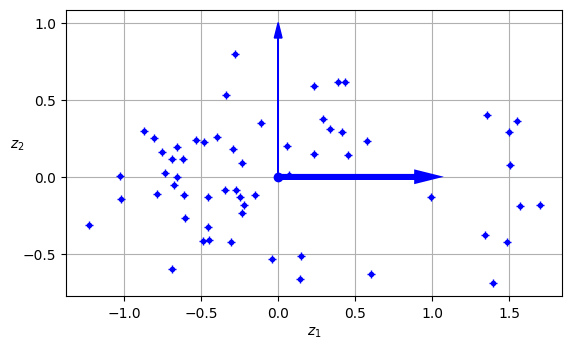

In [4]:
# extra code – this cell generates and saves Figure 8–3

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, aspect='equal')
ax.plot(X2D[:, 0], X2D[:, 1], "b+")
ax.plot(X2D[:, 0], X2D[:, 1], "b.")
ax.plot([0], [0], "bo")
ax.arrow(0, 0, 1, 0, head_width=0.05, length_includes_head=True,
         head_length=0.1, fc='b', ec='b', linewidth=4)
ax.arrow(0, 0, 0, 1, head_width=0.05, length_includes_head=True,
         head_length=0.1, fc='b', ec='b', linewidth=1)
ax.set_xlabel("$z_1$")
ax.set_yticks([-0.5, 0, 0.5, 1])
ax.set_ylabel("$z_2$", rotation=0)
ax.set_axisbelow(True)
ax.grid(True)
save_fig("dataset_2d_plot")

In [5]:
from sklearn.datasets import make_swiss_roll
X_swiss, t = make_swiss_roll(n_samples = 1000, noise = 0.1, random_state =42)

NameError: name 'save_fig' is not defined

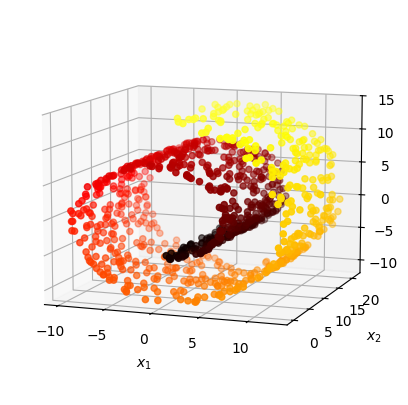

In [9]:
from matplotlib.colors import ListedColormap


darker_hot = ListedColormap(plt.cm.hot(np.linspace(0, 0.8, 256)))

axes = [-11.5, 14, -2, 23, -12, 15]

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_swiss[:, 0], X_swiss[:, 1], X_swiss[:, 2], c=t, cmap=darker_hot)
ax.view_init(10, -70)
set_xyz_axes(ax, axes)
save_fig("swiss_roll_plot")
plt.show()

NameError: name 'save_fig' is not defined

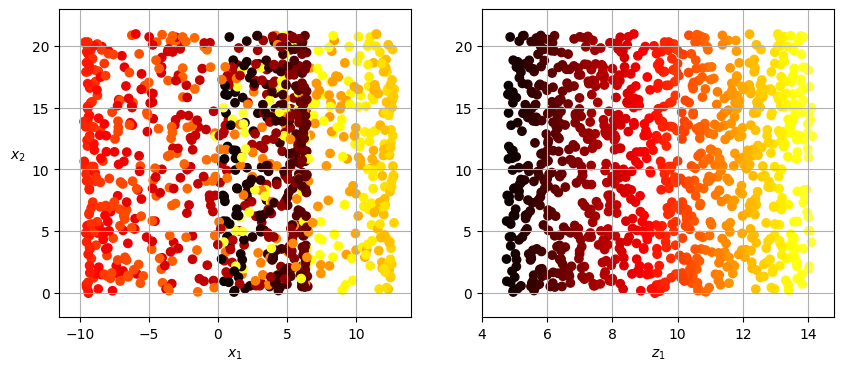

In [10]:

plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.scatter(X_swiss[:, 0], X_swiss[:, 1], c=t, cmap=darker_hot)
plt.axis(axes[:4])
plt.xlabel("$x_1$")
plt.ylabel("$x_2$", labelpad=10, rotation=0)
plt.grid(True)

plt.subplot(122)
plt.scatter(t, X_swiss[:, 1], c=t, cmap=darker_hot)
plt.axis([4, 14.8, axes[2], axes[3]])
plt.xlabel("$z_1$")
plt.grid(True)

save_fig("squished_swiss_roll_plot")
plt.show()